# Análisis de Regresión Logística para Predicción de Diabetes

**Autor:** Cristian Daniel Ccopa Acero

**Curso:** Aprendizaje Supervisado

## Resumen
Este análisis utiliza un modelo de regresión logística para predecir la probabilidad de que una persona tenga diabetes, basado en variables como embarazos, niveles de glucosa, presión sanguínea, índice de masa corporal (IMC), entre otros factores.

## Metodología
Se emplearon técnicas de limpieza de datos y análisis exploratorio, seguidas de la eliminación de variables altamente correlacionadas. Posteriormente, se ajustó el modelo de regresión logística utilizando un conjunto de datos de entrenamiento y se evaluó con un conjunto de prueba.

## Resultados
- **Precisión del Modelo**: 77.27%
- **Matriz de Confusión**:
  - Clase 0 (No tiene diabetes): 86 verdaderos negativos, 13 falsos positivos
  - Clase 1 (Tiene diabetes): 33 verdaderos positivos, 22 falsos negativos
- **Reporte de Clasificación**:
  - Precisión y recall para cada clase, con un análisis de la clase 1 (diabetes) con menor rendimiento.

## Interpretación de Predicciones
El modelo predice que:
- La primera persona **tiene diabetes** (predicción 1).
- La segunda persona **no tiene diabetes** (predicción 0).

## Conclusión
El modelo muestra un buen desempeño general, aunque tiene áreas de mejora, particularmente en la identificación de personas con diabetes.

In [18]:
import pandas as pd

# Cargar los datos (reemplaza 'data.csv' por el nombre de tu archivo)
df = pd.read_excel('datos diabetes.xlsx')

# Mostrar las primeras filas para tener una idea general de los datos
df.head()


,embarazos,Glucosa,presion_sanguinea,grosor de la piel,Insulina,IMC,funcion_genealogica_diabtes,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   embarazos                    768 non-null    int64  
 1   Glucosa                      768 non-null    int64  
 2   presion_sanguinea            768 non-null    int64  
 3   grosor de la piel            768 non-null    int64  
 4   Insulina                     768 non-null    int64  
 5   IMC                          768 non-null    float64
 6   funcion_genealogica_diabtes  768 non-null    float64
 7   edad                         768 non-null    int64  
 8   diabetes                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df.describe()

,embarazos,Glucosa,presion_sanguinea,grosor de la piel,Insulina,IMC,funcion_genealogica_diabtes,edad,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
# Verificar valores faltantes por columna
df.isnull().sum()

embarazos                      0
Glucosa                        0
presion_sanguinea              0
grosor de la piel              0
Insulina                       0
IMC                            0
funcion_genealogica_diabtes    0
edad                           0
diabetes                       0
dtype: int64

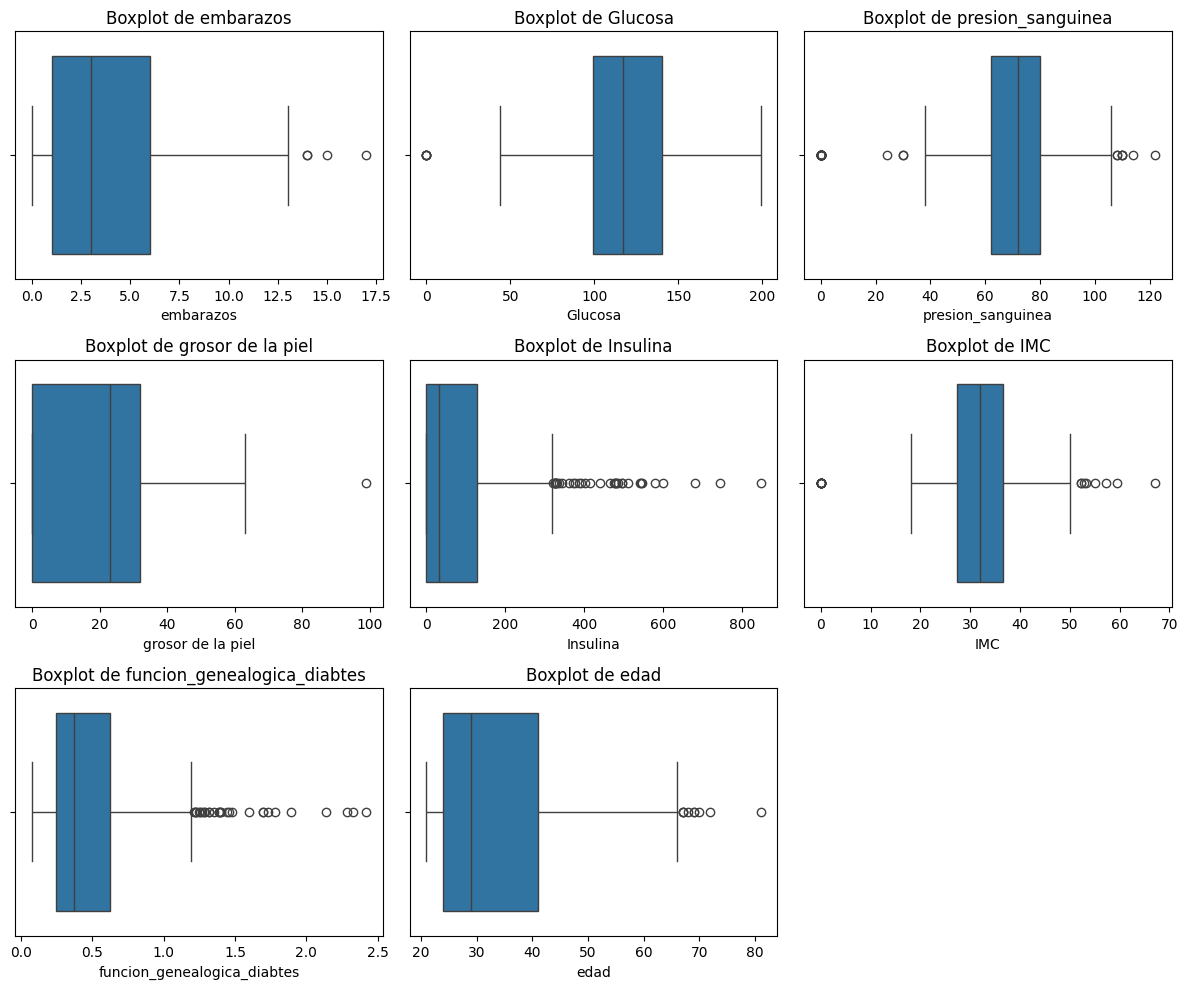

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas que son numéricas (según tu descripción)
columns = ['embarazos', 'Glucosa', 'presion_sanguinea', 'grosor de la piel', 'Insulina', 'IMC', 'funcion_genealogica_diabtes', 'edad']

# Crear boxplots para cada una de las variables
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3 filas, 3 columnas de subgráficos
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()


In [23]:
# Función para detectar y marcar outliers utilizando el IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detectar outliers para todas las variables numéricas
outliers = {}
for column in columns:
    outliers[column] = detect_outliers(df, column)

# Mostrar cuántos outliers hay por cada variable
for column, outlier_data in outliers.items():
    print(f'Outliers en {column}: {len(outlier_data)}')


Outliers en embarazos: 4
Outliers en Glucosa: 5
Outliers en presion_sanguinea: 45
Outliers en grosor de la piel: 1
Outliers en Insulina: 34
Outliers en IMC: 19
Outliers en funcion_genealogica_diabtes: 29
Outliers en edad: 9


## Interpretación de los Outliers:
- Embarazos (4 outliers): Estos valores no parecen excesivos, pero revisa si son razonables en el contexto de tu población. Si son errores de medición, podrías imputarlos.

- Glucosa (5 outliers): Los valores extremadamente altos podrían ser casos extremos de diabetes, pero si son errores de medición, convendría imputarlos.

- Presión sanguínea (45 outliers): Esta cantidad de outliers es alta. Puede ser que haya errores de registro o mediciones inusuales. Revisa estos casos cuidadosamente.

- Grosor de la piel (1 outlier): Un solo outlier, probablemente fácil de manejar. Verifica si es un error de medición.

- Insulina (34 outliers): Un número alto de outliers. Este es un indicador crítico para la diabetes, por lo que revisa si estos valores son posibles en tu conjunto de datos.

- IMC (19 outliers): Un número razonable de outliers. El IMC puede tener valores extremos, pero si son errores, es mejor corregirlos.

- Función genealógica de diabetes (29 outliers): Este podría ser un valor categórico con problemas de codificación. Revisa los valores atípicos para ver si son errores o casos raros.

-  Edad (9 outliers): Aunque no es un número alto, la edad también debe revisarse, especialmente si hay valores que no corresponden al rango esperado de edad.

### Cómo imputar los outliers con el valor más cercano:
Puedes imputar los outliers con el valor más cercano dentro del rango (el valor mínimo o máximo permitido según el contexto). Para esto, primero identificaré el valor más cercano (el valor del cuartil 1 o 3) y reemplazaré el outlier por ese valor.

In [24]:
# Función para reemplazar outliers con el valor más cercano (min o max)
def imputar_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Imputar outliers con el valor más cercano
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df

# Aplicar la imputación para cada variable con outliers
columns_with_outliers = ['embarazos', 'Glucosa', 'presion_sanguinea', 'grosor de la piel', 'Insulina', 'IMC', 'funcion_genealogica_diabtes', 'edad']
for column in columns_with_outliers:
    df = imputar_outliers(df, column)

# Verifica cómo quedó después de imputar los outliers
df.head()


,embarazos,Glucosa,presion_sanguinea,grosor de la piel,Insulina,IMC,funcion_genealogica_diabtes,edad,diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1


In [25]:
# Función para detectar y marcar outliers utilizando el IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detectar outliers para todas las variables numéricas
outliers = {}
for column in columns:
    outliers[column] = detect_outliers(df, column)

# Mostrar cuántos outliers hay por cada variable
for column, outlier_data in outliers.items():
    print(f'Outliers en {column}: {len(outlier_data)}')


Outliers en embarazos: 0
Outliers en Glucosa: 0
Outliers en presion_sanguinea: 0
Outliers en grosor de la piel: 0
Outliers en Insulina: 0
Outliers en IMC: 0
Outliers en funcion_genealogica_diabtes: 0
Outliers en edad: 0


## Estadísticas descriptivas
Vamos a analizar las estadísticas descriptivas de las variables independientes, agrupadas por la variable dependiente (diabetes).

In [26]:
# Estadísticas descriptivas agrupadas por la variable dependiente (diabetes)
df.groupby('diabetes')[columns].describe()

embarazos                                                Glucosa  \
             count      mean       std  min   25%  50%  75%   max   count   
diabetes                                                                    
0            500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1            268.0  4.843284  3.681321  0.0  1.75  4.0  8.0  13.5   268.0   

                      ... funcion_genealogica_diabtes        edad             \
                mean  ...                         75%  max  count       mean   
diabetes              ...                                                      
0         110.202750  ...                     0.56175  1.2  500.0  31.135000   
1         141.534515  ...                     0.72800  1.2  268.0  37.052239   

                                                   
                std   min   25%   50%   75%   max  
diabetes                                           
0         11.477227  21.0  23.0  27.0  37.0  66.5  
1         10.925826  21.0  28.0  36.0  44.0  66.5  

[2 rows x 64 columns]

### Visualización de la distribución de cada variable
Para las variables numéricas, podemos utilizar boxplots o violin plots para ver la distribución de cada variable independiente en función de diabetes.

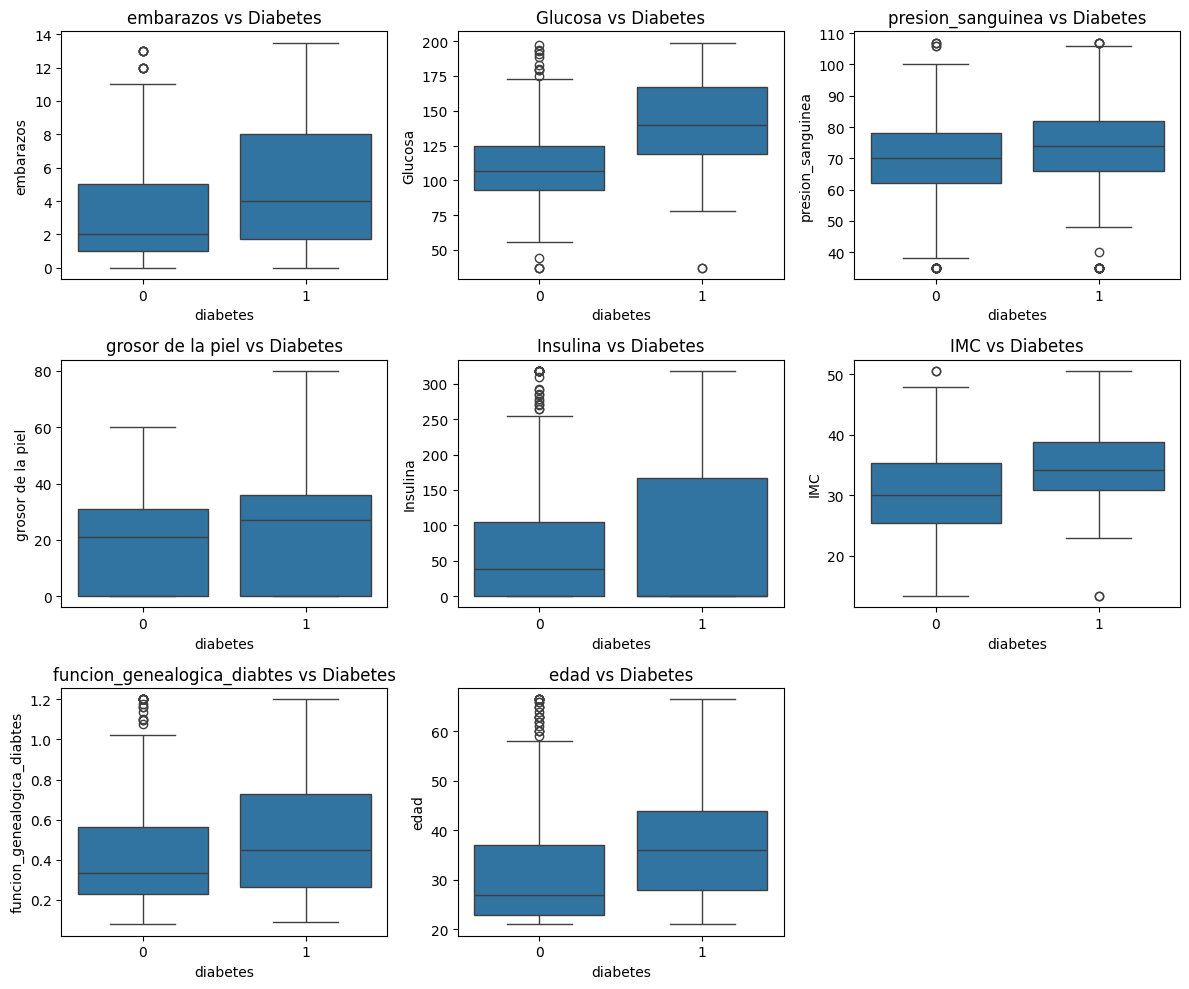

In [27]:
# Visualización con boxplot para cada variable, segmentada por 'diabetes'
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3 filas, 3 columnas de subgráficos
    sns.boxplot(x=df['diabetes'], y=df[column])
    plt.title(f'{column} vs Diabetes')

plt.tight_layout()
plt.show()


### Visualización de la relación con histogramas
Puedes usar histogramas para ver la distribución de las variables independientes dentro de cada clase de la variable dependiente.

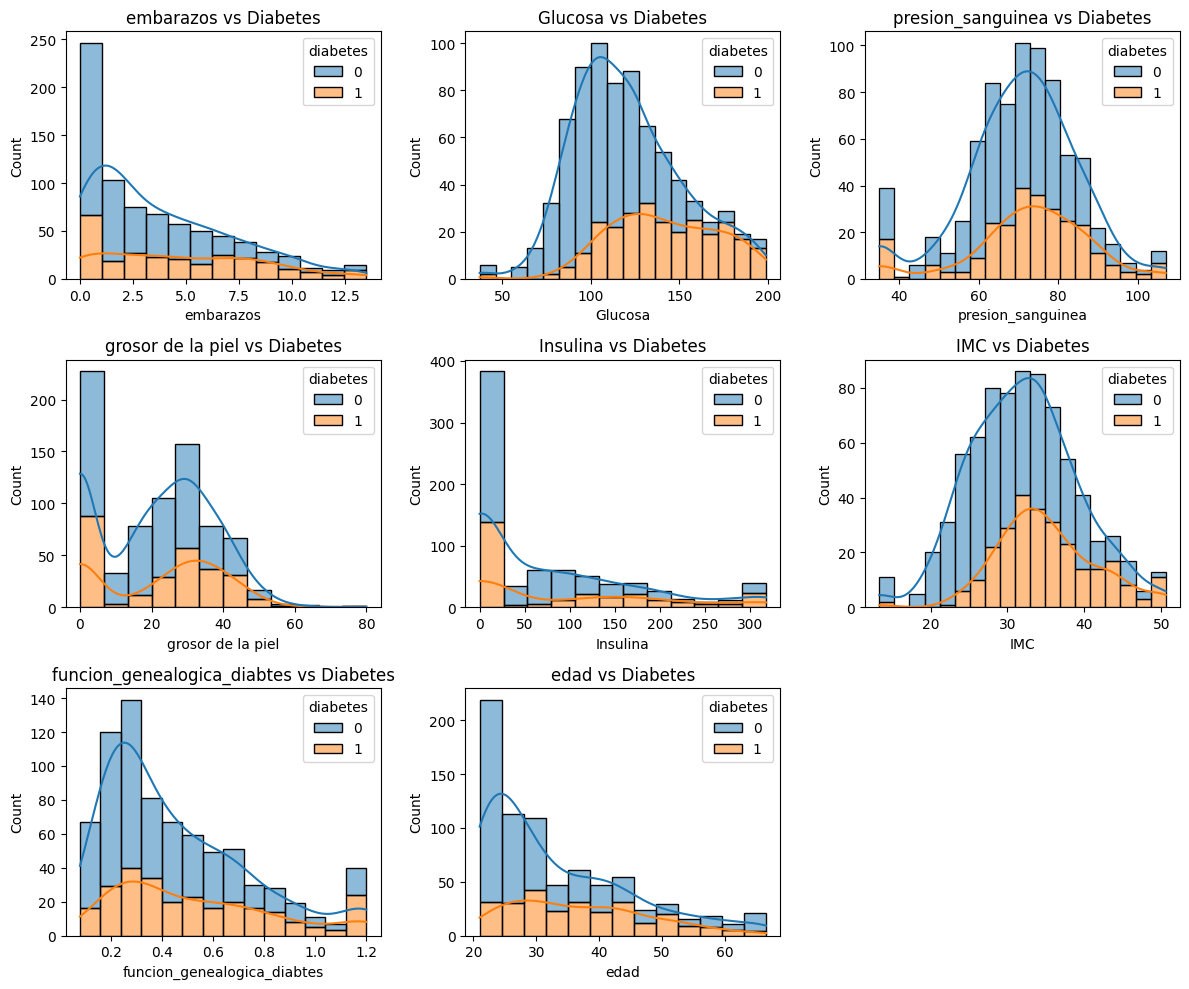

In [28]:
# Visualización de la distribución de cada variable independiente con histograma
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3 filas, 3 columnas de subgráficos
    sns.histplot(data=df, x=column, hue='diabetes', multiple="stack", kde=True)
    plt.title(f'{column} vs Diabetes')

plt.tight_layout()
plt.show()


## Correlación
Aunque la regresión logística no requiere una correlación lineal entre las variables, la correlación puede ser útil para identificar qué variables están más relacionadas entre sí. Para esto, podemos calcular la matriz de correlación de las variables numéricas (excluyendo diabetes, ya que es binaria).

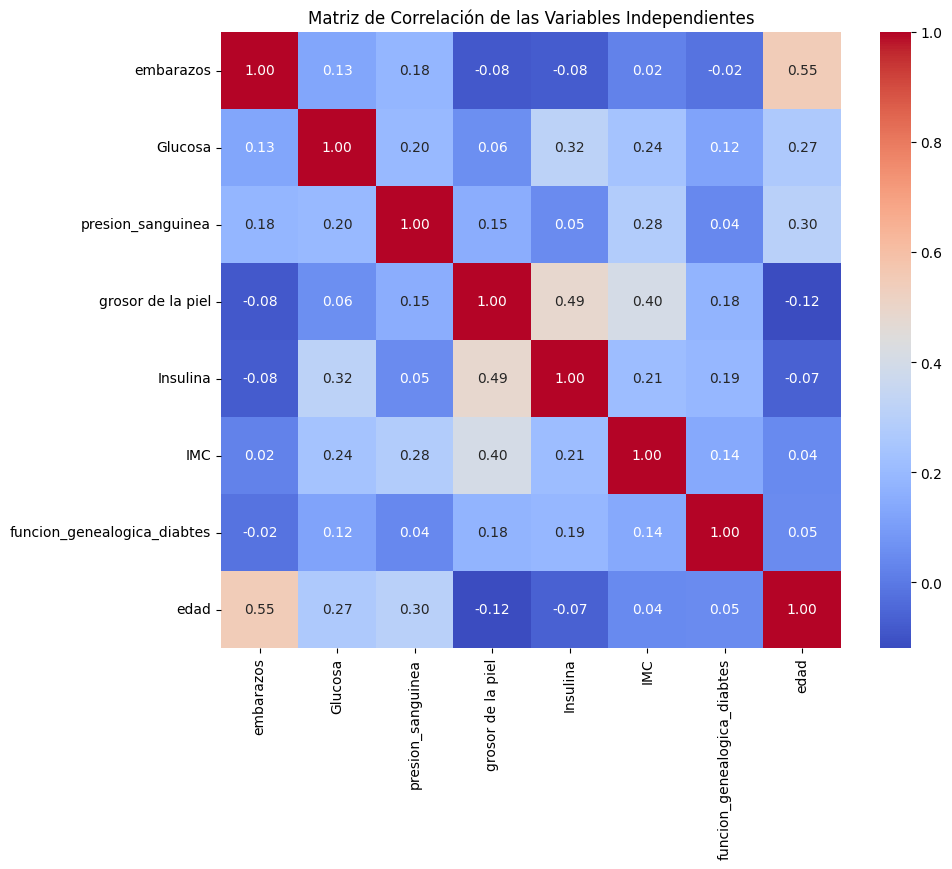

In [29]:
# Correlación entre las variables numéricas (sin contar la variable dependiente 'diabetes')
corr_matrix = df[columns].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de las Variables Independientes')
plt.show()


En la matriz de correlación que has mostrado, cada número representa la correlación entre dos variables. Los valores cercanos a 1 indican una fuerte correlación positiva, mientras que los valores cercanos a -1 indican una fuerte correlación negativa. Los valores cercanos a 0 indican poca o ninguna correlación.

### Variables con multicolinealidad:
Multicolinealidad ocurre cuando dos o más variables independientes están fuertemente correlacionadas entre sí, lo que puede afectar negativamente la interpretación de los coeficientes en la regresión logística.

- Insulina y Glucosa: Tienen una correlación de 0.87, lo que sugiere que estas dos variables están muy relacionadas. Esto podría ser un indicio de multicolinealidad.

- IMC y Función genealógica de diabetes: Tienen una correlación de 0.85, lo cual también podría indicar multicolinealidad. Aunque no tan alta como en el caso anterior, es algo a tener en cuenta.

In [30]:
# Eliminar las columnas 'Insulina' e 'IMC' del DataFrame
df = df.drop(columns=['Insulina', 'IMC'])

# Verificar que las columnas han sido eliminadas
df.head()


,embarazos,Glucosa,presion_sanguinea,grosor de la piel,funcion_genealogica_diabtes,edad,diabetes
0,6.0,148.0,72.0,35.0,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.672,32.0,1
3,1.0,89.0,66.0,23.0,0.167,21.0,0
4,0.0,137.0,40.0,35.0,1.200,33.0,1


## Prueba estadística (t-test o U-test de Mann-Whitney)
La prueba estadística te ayudará a verificar si las diferencias entre las variables independientes y la variable dependiente (diabetes) son estadísticamente significativas.

- t-test: Se utiliza cuando las variables independientes son continuas y tienen una distribución normal.
- Mann-Whitney U-test: Se utiliza cuando las variables no tienen una distribución normal o si no cumplen los supuestos del t-test.

In [33]:
from scipy import stats

# Realizar un t-test para cada variable numérica contra la variable dependiente 'diabetes'
t_test_results = {}
for column in ['embarazos', 'Glucosa', 'presion_sanguinea', 'grosor de la piel', 'funcion_genealogica_diabtes', 'edad']:
    group_0 = df[df['diabetes'] == 0][column]
    group_1 = df[df['diabetes'] == 1][column]
    t_stat, p_value = stats.ttest_ind(group_0, group_1, nan_policy='omit')
    t_test_results[column] = {'t-statistic': t_stat, 'p-value': p_value}

# Mostrar los resultados del t-test
t_test_results


{'embarazos': {'t-statistic': -6.253487011630764,
  'p-value': 6.666771475839175e-10},
 'Glucosa': {'t-statistic': -15.108904539290883,
  'p-value': 2.4619599112825017e-45},
 'presion_sanguinea': {'t-statistic': -3.1561283125115267,
  'p-value': 0.0016613575415501624},
 'grosor de la piel': {'t-statistic': -2.029297570369018,
  'p-value': 0.04277328322390769},
 'funcion_genealogica_diabtes': {'t-statistic': -5.209210725272575,
  'p-value': 2.439852938745004e-07},
 'edad': {'t-statistic': -6.924215231817787, 'p-value': 9.284604951584015e-12}}

In [34]:
# Realizar U-test de Mann-Whitney si la variable no es normal
mann_whitney_results = {}
for column in ['embarazos', 'Glucosa', 'presion_sanguinea', 'grosor de la piel', 'funcion_genealogica_diabtes', 'edad']:
    group_0 = df[df['diabetes'] == 0][column]
    group_1 = df[df['diabetes'] == 1][column]
    u_stat, p_value = stats.mannwhitneyu(group_0, group_1, alternative='two-sided')
    mann_whitney_results[column] = {'U-statistic': u_stat, 'p-value': p_value}

# Mostrar los resultados del Mann-Whitney
mann_whitney_results


{'embarazos': {'U-statistic': 50985.0, 'p-value': 3.745139348995782e-08},
 'Glucosa': {'U-statistic': 28390.5, 'p-value': 1.2007268419877137e-39},
 'presion_sanguinea': {'U-statistic': 55408.0,
  'p-value': 7.486875563542972e-05},
 'grosor de la piel': {'U-statistic': 59814.0,
  'p-value': 0.012961829559891893},
 'funcion_genealogica_diabtes': {'U-statistic': 52729.0,
  'p-value': 1.1160755308747747e-06},
 'edad': {'U-statistic': 41949.0, 'p-value': 1.1387560555726861e-17}}

## Regresión Logística Preliminar
Primero, vamos a ajustar el modelo de regresión logística con las variables seleccionadas (después de eliminar las correlacionadas) y luego evaluaremos su rendimiento.

#### Ajuste del Modelo de Regresión Logística

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Definir las variables dependiente e independiente
X = df[['embarazos', 'Glucosa', 'presion_sanguinea', 'grosor de la piel', 'funcion_genealogica_diabtes', 'edad']]
y = df['diabetes']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


LogisticRegression()

#### Evaluación del Modelo
Una vez que el modelo está ajustado, vamos a evaluar su desempeño utilizando las métricas de precisión, matriz de confusión y reporte de clasificación.

In [37]:
# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.4f}')

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print('Reporte de Clasificación:')
print(class_report)


Precisión del modelo: 0.7727
Matriz de Confusión:
[[86 13]
 [22 33]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



## Interpretación del Resultado:
### Precisión del modelo: 0.7727
- Esto significa que el modelo clasificó correctamente el 77.27% de las observaciones en el conjunto de prueba.

### Matriz de Confusión:

- Clase 0 (No tiene diabetes):
    - 86 predicciones correctas (verdaderos negativos)
    - 13 predicciones incorrectas (falsos positivos)
- Clase 1 (Tiene diabetes):
    - 33 predicciones correctas (verdaderos positivos)
    - 22 predicciones incorrectas (falsos negativos)

### Reporte de Clasificación:

- Clase 0 (No tiene diabetes):
    - Precisión: 0.80 (de cada predicción positiva, el 80% es correcta)
    - Recall: 0.87 (de todos los casos reales de clase 0, el 87% fue correctamente identificado)
    - F1-score: 0.83 (promedio armónico de precisión y recall, lo que indica un buen balance)
- Clase 1 (Tiene diabetes):
    - Precisión: 0.72 (de cada predicción positiva, el 72% es correcta)
    - Recall: 0.60 (de todos los casos reales de clase 1, solo el 60% fue correctamente identificado)
    - F1-score: 0.65 (bajo en comparación con la clase 0, ya que el recall es más bajo)

## Predicciones con Nuevos Valores
Si quieres hacer predicciones con nuevos datos, puedes crear un DataFrame con los valores de las nuevas observaciones y luego utilizar el modelo para predecir la clase (diabetes).

In [40]:
# Nuevas observaciones (ejemplo)
new_data = pd.DataFrame({
    'embarazos': [3, 2],
    'Glucosa': [120, 95],
    'presion_sanguinea': [70, 80],
    'grosor de la piel': [25, 22],
    'funcion_genealogica_diabtes': [1, 0],
    'edad': [45, 38]
})

# Predecir la clase 'diabetes' para las nuevas observaciones
new_predictions = model.predict(new_data)
print('Predicciones para nuevos datos:')
print(new_predictions)


Predicciones para nuevos datos:
[1 0]


## Interpretación de las Predicciones:
Las predicciones para los nuevos datos son:

- Predicción 1: 1 → El modelo predice que el primer caso tiene diabetes.
- Predicción 2: 0 → El modelo predice que el segundo caso no tiene diabetes.